# Predicting Car Prices

### We will be working with a dataset that contains information on various cars, and will be trying to predict a car's market price by using its attributes, using the K-Nearest Neighbour methodology.

## Introduction to the Dataset

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

Dataset is available [here](https://archive.ics.uci.edu/ml/datasets/automobile) amd can be downloaded from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data)

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 99

In [2]:
cars = pd.read_csv('imports-85.data')
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


The column names don't match the ones in the [dataset's documentation](https://archive.ics.uci.edu/ml/datasets/automobile)<br>
The data table is apparently missing headers.

In [3]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names = cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### The Target column is the Price.
### The Columns that we can use as features have to be numeric, and are:

In [4]:
continuous_values_cols = ['normalized-losses', 'wheel-base','length','width','height','curb-weight','engine-size','bore',
                         'stroke','compression-rate','horsepower','peak-rpm','city-mpg','highway-mpg','price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

In [5]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
numeric_cars = numeric_cars.astype(float)
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Drop rows with missing `Price`

In [7]:
numeric_cars = numeric_cars.dropna(subset=['price'])
# print(numeric_cars.head())
print(numeric_cars.isnull().sum())

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64


We will replace the remaining missing values with the average values from that column

In [8]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [9]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

No more missing values exist

### Normalize numeric columns so that values range from 0 to 1

In [10]:
# extract out price column
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# Test with univariate K-Nearest Neighbors Model

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    last_train_row = int(len(rand_df) / 2)
    
    # Split half to training and testing sets
    train_df = rand_df[0:last_train_row]
    test_df = rand_df[last_train_row:]
    
    # Fit model with training data
    knn.fit(train_df[[training_col]], train_df[target_col])
    # Predict test data
    predictions = knn.predict(test_df[[training_col]])
    # Calculate and return RMSE
    mse = mean_squared_error(test_df[target_col],predictions)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.

for col in train_cols:
    rmse_value = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_value

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

### Modify the knn_train_test() function to accept a parameter for k value

In [12]:
def knn_train_test(training_col, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    last_train_row = int(len(rand_df) / 2)
    
    # Split half to training and testing sets
    train_df = rand_df[0:last_train_row]
    test_df = rand_df[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:    
        # Fit model with training data
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[training_col]], train_df[target_col])
        # Predict test data
        predictions = knn.predict(test_df[[training_col]])
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col],predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val
k_rmse_results

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


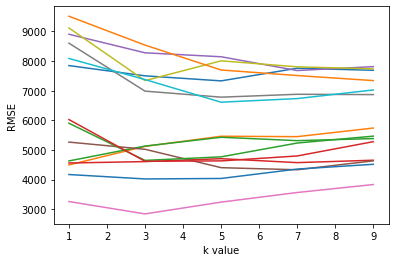

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

# Multivariate Model

In [14]:
# Compute average RMSE across different `k` values for each feature
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

# get the features name
sorted_features = sorted_series_avg_rmse.index
print(sorted_features)

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64
Index(['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg',
       'length', 'city-mpg', 'wheel-base', 'compression-rate', 'bore',
       'normalized-losses', 'stroke', 'peak-rpm', 'height'],
      dtype='object')


In [15]:
def knn_train_test(training_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    last_train_row = int(len(rand_df) / 2)
    
    # Split half to training and testing sets
    train_df = rand_df[0:last_train_row]
    test_df = rand_df[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:    
        # Fit model with training data
        knn = KNeighborsRegressor(n_neighbors=k)
#         knn = KNeighborsRegressor()
        knn.fit(train_df[training_cols], train_df[target_col])
        # Predict test data
        predictions = knn.predict(test_df[training_cols])
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col],predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_features in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_features)] = knn_train_test(
        sorted_features[:nr_best_features], 'price', numeric_cars)
k_rmse_results

{'2 best features': {5: 2949.8817277180374},
 '3 best features': {5: 3580.7376651928435},
 '4 best features': {5: 3487.340917327035},
 '5 best features': {5: 3410.2170133901805},
 '6 best features': {5: 3478.510890118539}}

# Hyperparameter Tuning

In [16]:
def knn_train_test(training_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    last_train_row = int(len(rand_df) / 2)
    
    # Split half to training and testing sets
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [x for x in range(1,26)]
    k_rmses = {}
    
    for k in k_values:    
        # Fit model with training data
        knn = KNeighborsRegressor(n_neighbors=k)
#         knn = KNeighborsRegressor()
        knn.fit(train_df[training_cols], train_df[target_col])
        # Predict test data
        predictions = knn.predict(test_df[training_cols])
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col],predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_features in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_features)] = knn_train_test(
        sorted_features[:nr_best_features], 'price', numeric_cars)
k_rmse_results

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579,
  25: 4955.892429427362},
 '3 best features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.21649

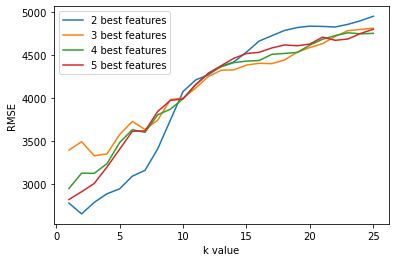

In [17]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()

#### For the best 2 features, a k value of 2 is ideal.
#### For the best 3 features, a k value of 3 is ideal.
#### For the best 4 features, a k value of 1 is ideal.
#### For the best 5 features, a k value of 1 is ideal.

# Next Steps:

- Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation.
- Modify the knn_train_test() function to perform the data cleaning as well.

https://community.dataquest.io/tags/c/social/share/49/155